### Credit card fraud detection
In this project we will attempt to fit several machine learning models on skewed data. The data is highly imbalanced.
We would like to invesitgate which of the methods below work best with unbalanced data.
* Auto Machine Learning
* Logistic Regression
* SVMs
* Decision trees
* anomaly detection


In [4]:
import sklearn
import scipy as sci
import matplotlib as plt
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import numpy as np
import pandas as pd
import statsmodels
import bokeh
import sympy
import requests
import blaze
import seaborn as sns
sns.set(color_codes=True)
#from auto_ml import Predictor
#from auto_ml.utils_models import load_ml_model

# suppress warning messages
import warnings
warnings.filterwarnings("ignore")

#import warnings

#def fxn():
#    warnings.warn("deprecated", DeprecationWarning)

#with warnings.catch_warnings():
#    warnings.simplefilter("ignore")
#    fxn()


/Users/nanaakwasiabayieboateng/anaconda/lib/python3.5/site-packages/odo/backends/pandas.py:102: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access NaTType as type(pandas.NaT)
  @convert.register((pd.Timestamp, pd.Timedelta), (pd.tslib.NaTType, type(None)))


In [5]:
creditcard=pd.read_csv("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/H20/creditcard.csv")
creditcard.head()

hrdata=pd.read_excel("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

bankdata2=pd.DataFrame.from_csv("/Users/nanaakwasiabayieboateng/Documents/memphisclassesbooks/DataMiningscience/Anomalydetection/bank/bank-full.csv", sep=';')

bankdata2.head()

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,,,,,,,,,,,,,,,,
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [20]:
hrdata.head()





,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [21]:
hrdata.describe()




,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [22]:
hrdata['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

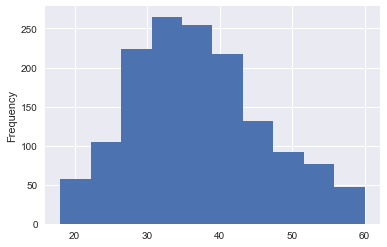

In [23]:
#%matplotlib inline
hrdata['Age'].plot(kind="hist")
plt.show()


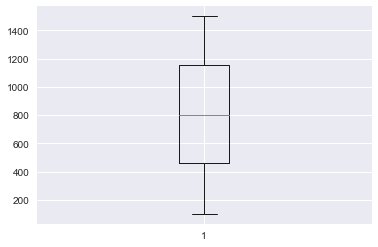

In [24]:
plt.boxplot(hrdata['DailyRate'])
# suppresses message
plt.show()

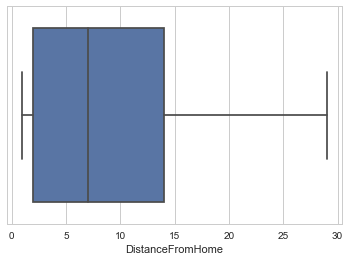

In [25]:

sns.set_style("whitegrid")
ax = sns.boxplot(x=hrdata['DistanceFromHome'])

In [26]:
hrdata.shape

(1470, 35)

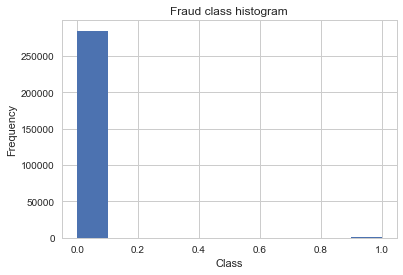

In [ ]:
%matplotlib inline
creditcard['Class'].plot(kind="hist")
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
x=creditcard['Class']
sns.distplot(x, kde=False, rug=True)


In [ ]:
#count_classes = pd.value_counts(creditcard['Class'], sort = True).sort_index()
#count_classes.plot(kind = 'bar')
#plt.title("Fraud class histogram")
#plt.xlabel("Class")
#plt.ylabel("Frequency")

#### Split dataframe into training set and test set

In [ ]:


from sklearn.model_selection import train_test_split

train, test = train_test_split(hrdata, test_size=0.3)

In [ ]:
train.shape

In [ ]:
test.shape

#### Alternatively

In [ ]:
#split dataframe into train and test, 70% and 30% respectively

index = np.random.rand(len(hrdata)) < 0.7

train2 = hrdata[index]

test2 = hrdata[~index]

In [ ]:
train2.shape

#### Another way

In [ ]:
train3, validate, test3 = np.split(hrdata.sample(frac=1), [int(.6*len(hrdata)), int(.8*len(hrdata))])


In [ ]:
train3.shape


In [ ]:
validate.shape


In [ ]:
test3.shape

#### create labels from split data

In [ ]:
train_label=train['Attrition']

In [ ]:
test_label=test['Attrition']

In [ ]:
X_train=train.loc[:, train.columns != 'Attrition']

In [ ]:
X_test=test.loc[:, test.columns != 'Attrition']

#### Alternatively

In [14]:

import h2o


# Number of threads, nthreads = -1, means use all cores on your machine
# max_mem_size is the maximum memory (in GB) to allocate to H2O
h2o.init(nthreads = -1, max_mem_size = 8)



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 22 hours 55 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_nanaakwasiabayieboateng_sskxgs
H2O cluster total nodes:,1
H2O cluster free memory:,1.496 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [16]:

creditcard_h2o = h2o.H2OFrame(creditcard)


creditcard_h2o['Class']= creditcard_h2o['Class'].asfactor()  #encode the binary repsonse as a factor
creditcard_h2o['Class'].levels()  #optional: after encoding, this shows the two factor levels, '0' and '1' 



Parse progress: |█████████████████████████████████████████████████████████| 100%


[['0', '1']]

In [17]:
# Partition data into 70%, 15%, 15% chunks
# Setting a seed will guarantee reproducibility

splits = creditcard_h2o.split_frame(ratios=[0.7, 0.15], seed=1)  

train = splits[0]
valid = splits[1]
test = splits[2]

In [18]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


y = 'Class'
x = list(creditcard_h2o.columns)

x.remove(y)  #remove the response


# Run AutoML for 30 seconds
aml = H2OAutoML(max_runtime_secs = 30)
aml.train(x = x, y = y,
          training_frame = train,
          leaderboard_frame = test)

# View the AutoML Leaderboard
lb = aml.leaderboard



# The leader model is stored here
aml.leader


# If you need to generate predictions on a test set, you can make
# predictions directly on the `"H2OAutoML"` object, or on the leader
# model object directly

preds = aml.predict(test)

# or:
preds = aml.leader.predict(test)

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,1 day 22 hours 56 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,4 days
H2O cluster name:,H2O_from_python_nanaakwasiabayieboateng_sskxgs
H2O cluster total nodes:,1
H2O cluster free memory:,1.294 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [19]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb

model_id,auc,logloss
StackedEnsemble_0_AutoML_20171024_214740,0.95676,0.002539
DRF_0_AutoML_20171024_214740,0.95676,0.004338


In [16]:
# The leader model is stored here
aml.leader



Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_0_AutoML_20171022_225509
No model summary for this model


ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.07837827351742321
RMSE: 0.27996120002140157
LogLoss: 0.3000271832485442
Null degrees of freedom: 7012
Residual degrees of freedom: 7007
Null deviance: 9698.448800884504
Residual deviance: 4208.181272244081
AIC: 4220.181272244081
AUC: 0.9866684946218133
Gini: 0.9733369892436265
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5092507361630617: 


,0,1,Error,Rate
0,3053.0,250.0,0.0757,(250.0/3303.0)
1,176.0,3534.0,0.0474,(176.0/3710.0)
Total,3229.0,3784.0,0.0607,(426.0/7013.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5092507,0.9431545,200.0
max f2,0.4300857,0.9617922,229.0
max f0point5,0.6169239,0.9498516,159.0
max accuracy,0.5092507,0.9392557,200.0
max precision,0.9396542,1.0,0.0
max recall,0.2231046,1.0,314.0
max specificity,0.9396542,1.0,0.0
max absolute_mcc,0.5092507,0.8781482,200.0
max min_per_class_accuracy,0.5353713,0.9370269,191.0
max mean_per_class_accuracy,0.5092507,0.9384359,200.0


Gains/Lift Table: Avg response rate: 52.90 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0101241,0.9205804,1.8902965,1.8902965,1.0,1.0,0.0191375,0.0191375,89.0296496,89.0296496
,2,0.0201055,0.9131545,1.8902965,1.8902965,1.0,1.0,0.0188679,0.0380054,89.0296496,89.0296496
,3,0.0300870,0.9064613,1.8902965,1.8902965,1.0,1.0,0.0188679,0.0568733,89.0296496,89.0296496
,4,0.0400684,0.9004632,1.8902965,1.8902965,1.0,1.0,0.0188679,0.0757412,89.0296496,89.0296496
,5,0.0500499,0.8963598,1.8902965,1.8902965,1.0,1.0,0.0188679,0.0946092,89.0296496,89.0296496
,6,0.1000998,0.8780728,1.8902965,1.8902965,1.0,1.0,0.0946092,0.1892183,89.0296496,89.0296496
,7,0.1500071,0.8604509,1.8902965,1.8902965,1.0,1.0,0.0943396,0.2835580,89.0296496,89.0296496
,8,0.2000570,0.8384346,1.8902965,1.8902965,1.0,1.0,0.0946092,0.3781671,89.0296496,89.0296496
,9,0.3000143,0.7846956,1.8902965,1.8902965,1.0,1.0,0.1889488,0.5671159,89.0296496,89.0296496
,10,0.3999715,0.6975453,1.8336685,1.8761445,0.9700428,0.9925134,0.1832884,0.7504043,83.3668498,87.6144544




ModelMetricsBinomialGLM: stackedensemble
** Reported on validation data. **

MSE: 0.18965991772295915
RMSE: 0.435499618510693
LogLoss: 0.5601512351404265
Null degrees of freedom: 2986
Residual degrees of freedom: 2981
Null deviance: 4129.673929107059
Residual deviance: 3346.343478728908
AIC: 3358.343478728908
AUC: 0.7821541556226572
Gini: 0.5643083112453144
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3273180606845608: 


,0,1,Error,Rate
0,617.0,785.0,0.5599,(785.0/1402.0)
1,168.0,1417.0,0.106,(168.0/1585.0)
Total,785.0,2202.0,0.319,(953.0/2987.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3273181,0.7483496,287.0
max f2,0.1600167,0.8592722,361.0
max f0point5,0.6039513,0.7500372,158.0
max accuracy,0.5537991,0.7181118,181.0
max precision,0.9342227,1.0,0.0
max recall,0.0905619,1.0,392.0
max specificity,0.9342227,1.0,0.0
max absolute_mcc,0.5929257,0.4447317,163.0
max min_per_class_accuracy,0.5232457,0.7129338,196.0
max mean_per_class_accuracy,0.5929257,0.7212232,163.0


Gains/Lift Table: Avg response rate: 53.06 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100435,0.9045635,1.7589064,1.7589064,0.9333333,0.9333333,0.0176656,0.0176656,75.8906414,75.8906414
,2,0.0200870,0.8929567,1.6960883,1.7274974,0.9,0.9166667,0.0170347,0.0347003,69.6088328,72.7497371
,3,0.0301306,0.8872381,1.8217245,1.7589064,0.9666667,0.9333333,0.0182965,0.0529968,82.1724501,75.8906414
,4,0.0401741,0.8808855,1.6960883,1.7432019,0.9,0.925,0.0170347,0.0700315,69.6088328,74.3201893
,5,0.0502176,0.8736918,1.6960883,1.7337792,0.9,0.92,0.0170347,0.0870662,69.6088328,73.3779180
,6,0.1001004,0.8442582,1.6189359,1.6765496,0.8590604,0.8896321,0.0807571,0.1678233,61.8935913,67.6549592
,7,0.1499833,0.8163415,1.5556962,1.6363551,0.8255034,0.8683036,0.0776025,0.2454259,55.5696229,63.6355059
,8,0.2002009,0.7851297,1.6332702,1.6355813,0.8666667,0.8678930,0.0820189,0.3274448,63.3270242,63.5581275
,9,0.2999665,0.7126261,1.3849491,1.5522237,0.7348993,0.8236607,0.1381703,0.4656151,38.4949082,55.2223693
,10,0.4000670,0.6307725,1.3172890,1.4934409,0.6989967,0.7924686,0.1318612,0.5974763,31.7288965,49.3440862


In [20]:
preds.head()

predict,p0,p1
0,0.999674,0.000326387
0,0.999674,0.000326383
0,0.999674,0.000326387
0,0.999674,0.000326383
0,0.999674,0.000326383
0,0.999674,0.000326395
0,0.999674,0.000326383
0,0.999674,0.000326387
0,0.999674,0.000326395
0,0.999673,0.000326976


#### Autosklearn
auto-sklearn is an automated machine learning toolkit and a drop-in replacement for a scikit-learn estimator:

In [7]:
train.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
249,45,No,Travel_Frequently,1199,Research & Development,7,4,Life Sciences,1,341,...,4,80,1,9,1,3,3,2,0,2
1044,49,No,Travel_Rarely,1495,Research & Development,5,4,Technical Degree,1,1473,...,2,80,1,20,0,2,3,2,1,2
599,36,No,Travel_Rarely,1041,Human Resources,13,3,Human Resources,1,829,...,2,80,1,8,2,3,5,2,0,4
663,21,Yes,Travel_Rarely,1427,Research & Development,18,1,Other,1,923,...,1,80,0,1,3,2,1,0,0,0
1074,33,No,Travel_Rarely,516,Research & Development,8,5,Life Sciences,1,1515,...,1,80,0,14,6,3,0,0,0,0
